### Thanks to UCI Machine Learning Repository
Citation Request:
Please include this citation if you plan to use this database: 
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

Dataset Found here: https://archive.ics.uci.edu/ml/datasets/wine+quality

In [1]:
import pandas as pd
import numpy as np
import pdb
import copy
import sys
sys.path.append('../Auto_ViML/')

In [2]:
df = pd.read_csv('../data_sets/winequality.csv', index_col=None)
df = df.sample(frac=1.0,random_state=42)
target = 'quality'
print(df.shape)
df.head()

(6497, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
3103,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,0
1419,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,1
4761,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,0
4690,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,0
4032,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,0


In [3]:
cols = ['volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','density','alcohol']
for col in cols:
    df[col] = np.log10(1+df[col]).fillna(0)

In [4]:
num = int(0.9*df.shape[0])
test = df[num:]
train = df[:num]
train[target].mean()

5.819052505558406

In [5]:
sample_submission = ''
scoring_parameter = 'f1'

Train (Size: 5847,13) has Single_Label with target: ['quality']
"
 ################### Multi-Class ######################
Shuffling the data set before training
 Class  -> Counts -> Percent
     6:    2548  ->   43.6%
     8:     177  ->    3.0%
     5:    1923  ->   32.9%
     7:     971  ->   16.6%
     4:     194  ->    3.3%
     3:      29  ->    0.5%
     9:       5  ->    0.1%
Selecting 7-Class Classifier...
    Using GridSearchCV for Hyper Parameter tuning...
String or Multi Class target: quality transformed as follows: {8: 0, 5: 1, 7: 2, 6: 3, 4: 4, 3: 5, 9: 6}
Classifying variables in data set...
    Number of Numeric Columns =  11
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Numbe

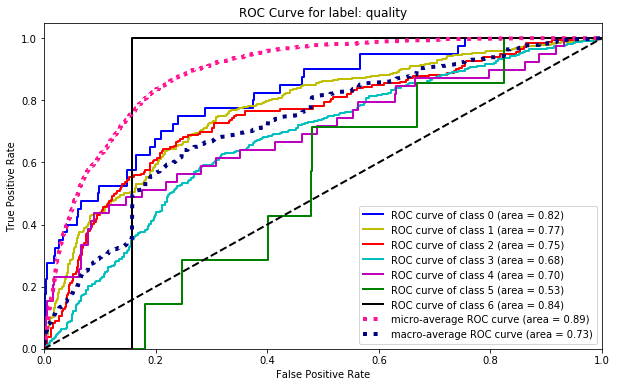

Average precision score, micro-averaged over all classes: 0.53
Weighted F1 score, averaged over all classes: 0.32


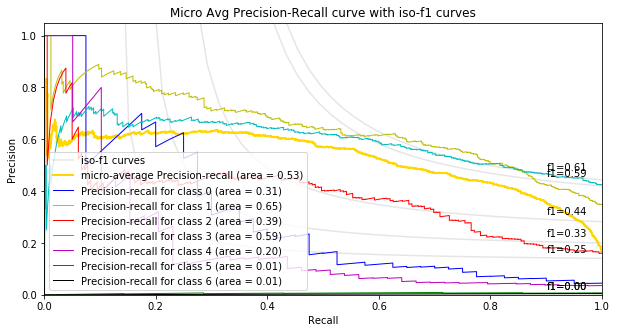

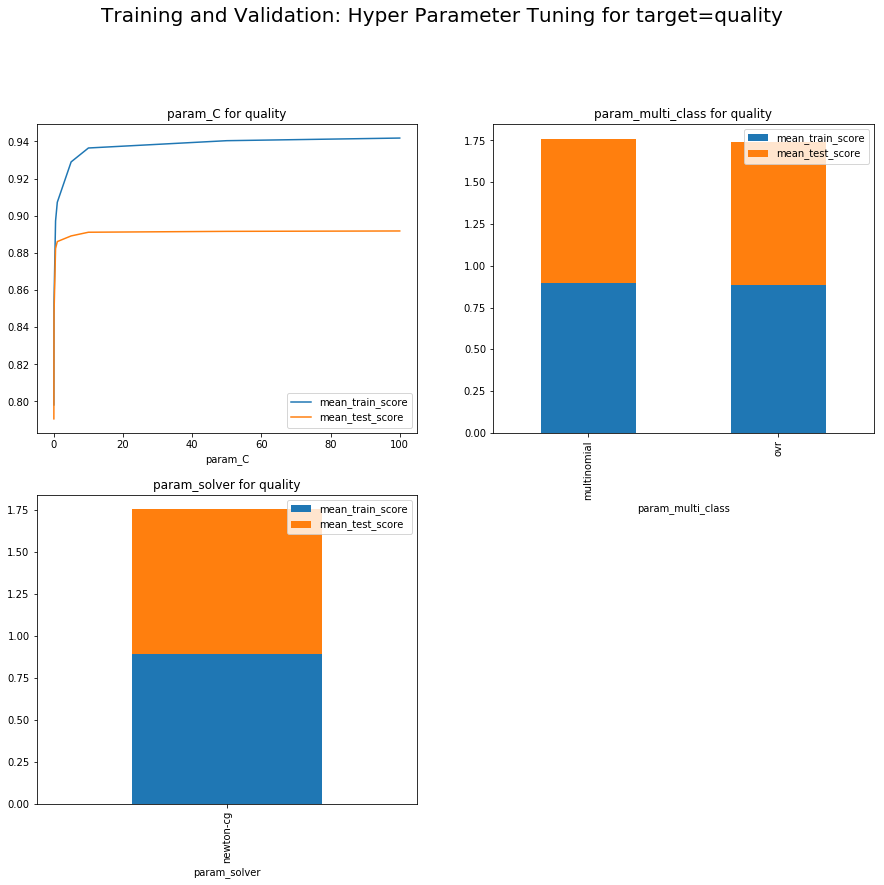

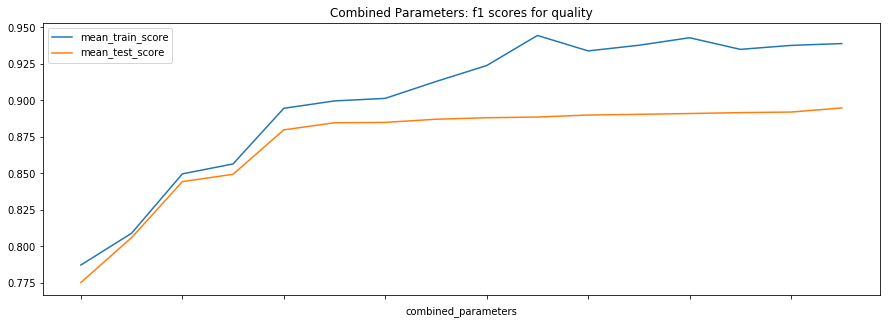

    Time taken for this Target (in seconds) = 105


Plotting Feature Importances to explain the output of model

###################################################################################
Training model on complete Train data and Predicting using give Test Data...
Binning Top 5 continuous variables...
    Binning and replacing 5 numeric features.
    Adding 1 Feature using KMeans_Featurizer...
CAUTION: Stacking can produce Highly Overfit models on Training Data...
    Adding 7 Stacking feature(s) to training data
Number of numeric variables = 9
    No variables were removed since no highly correlated variables found in data
    Adding 9 categorical variables to reduced numeric variables  of 9
Selected No. of variables = 18 
Finding Important Features...
        in 18 variables
        in 14 variables
        in 10 variables
        in 6 variables
        in 2 variables
    Found 18 important features
Training Imbalanced Data set...
Downsampling Majority Class since Imbalanced_Flag is set to True
Rare Class = 6
    Pct of Rare C

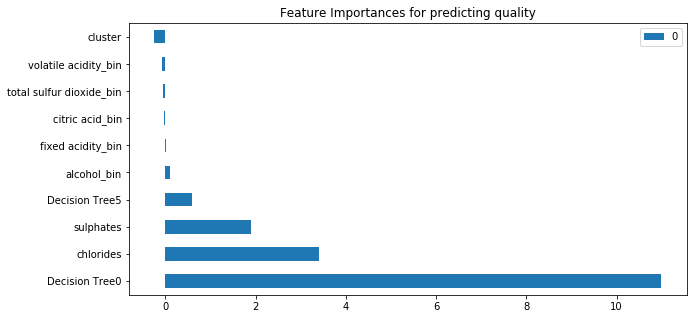

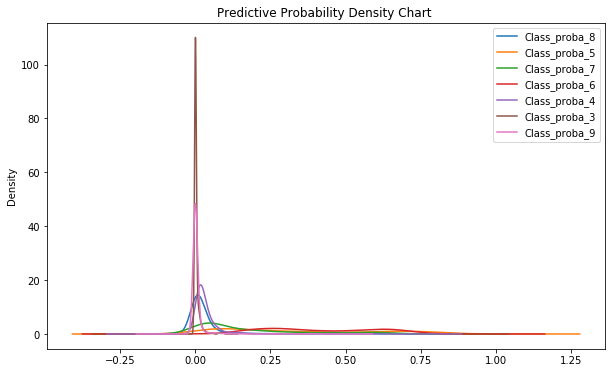

In [6]:
from autoviml.Auto_ViML import Auto_ViML
#### If Boosting_Flag = True => XGBoost, False=>ExtraTrees, None=>Linear Model
model, features, trainm, testm = Auto_ViML(train, target, test,sample_submission='',hyper_param='GS',
            scoring_parameter='f1', Boosting_Flag=None, KMeans_Featurizer=True,
            Add_Poly=0, Stacking_Flag=True, Binning_Flag=True,
              Imbalanced_Flag=True, verbose=2)                             

In [10]:
from sklearn.metrics import f1_score,accuracy_score,accuracy_score
def accu(results, y_cv):
    return (results==y_cv).astype(int).sum(axis=0)/(y_cv.shape[0])
def rmse(results, y_cv):
    return np.sqrt(np.mean((results - y_cv)**2, axis=0))
def plot_scatter(actual, predicted):
    pldf = pd.DataFrame([actual, predicted]).T
    pldf.columns=['Actual','Predicted']
    pldf.plot(x='Actual',y='Predicted',kind='scatter')
####################

In [8]:
testm.columns

Index(['Decision Tree2', 'Decision Tree1', 'Decision Tree3', 'Decision Tree0',
       'alcohol_bin', 'Decision Tree4', 'volatile acidity_bin', 'cluster',
       'red_wine', 'chlorides', 'residual sugar', 'sulphates',
       'Decision Tree5', 'total sulfur dioxide_bin', 'fixed acidity_bin', 'pH',
       'citric acid_bin', 'Decision Tree6', 'Class_proba_8', 'Class_proba_5',
       'Class_proba_7', 'Class_proba_6', 'Class_proba_4', 'Class_proba_3',
       'Class_proba_9', 'quality_Stacked_predictions'],
      dtype='object')

In [11]:
print(accu(test[target].values,testm[target+'_Stacked_predictions']))

0.6076923076923076
